# The SPARKS foundation #GRIPSEPT21

Author: N K S Mayukh , Data Science and Business analytics intern

Given question is "From the given 'Iris' data set and 
predict the optimum number of clusters and represent it visually.

At first we need to import necessry libraries

The dataset https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view
    

In [46]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans 

from sklearn.preprocessing import MinMaxScaler, scale

from sklearn.metrics import silhouette_score

we have to read the given data set

In [47]:
data = pd.read_csv('Iris.csv')
x = data.iloc[:, [0, 1, 2, 3]].values

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


So there are 150 values and we have no missing values.
there are 6 feautres: Id, 
                      SepalLengthCm, 
                      SepalWidthCm, 
                      PetalLengthCm, 
                      PetalWidthCm, 
                      Species

In [49]:
data.head()  #prints the first 5 rows of data set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
data.size

900

In [51]:
data.shape

(150, 6)

We don't need Id column so we can remove that column for simplicity

In [52]:
data.drop(data.columns[[0]], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Now we need to count number of individual species

In [53]:
data_1 = pd.crosstab(index=data["Species"], columns="count") #making a crosstab to check the count of the species
data_1

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


So there are three species of 50 each

In [54]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Based on the correlation we can remove a feature which is not in correlation with others but from above data all the columns are in some correlation with each other.

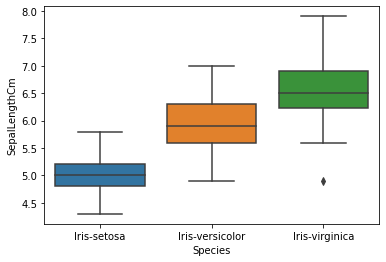

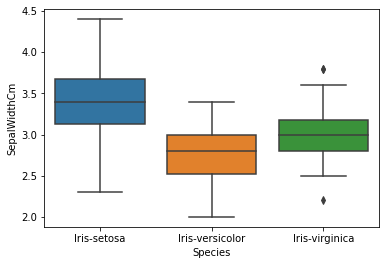

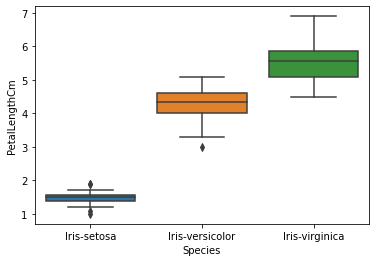

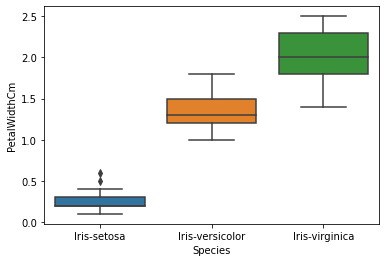

In [55]:
sns.boxplot(x="Species",y="SepalLengthCm",data=data)
plt.show()
sns.boxplot(x="Species",y="SepalWidthCm",data=data)
plt.show()
sns.boxplot(x="Species",y="PetalLengthCm",data=data)
plt.show()
sns.boxplot(x="Species",y="PetalWidthCm",data=data)
plt.show()

Box plots divide the data into sections that each contain approximately 25% of the data in that set. Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.

So from above boxplot we can interpret that 'Iris-virginica' species has more Sepal Length, Petal length, Petal width and Species 'Iris setosa' has more Sepal Width but has less sepal length,petal length and petal width. Iris versicolor has intermediate values.

A pairs plot allows us to see both distribution of single variables and relationships between two variables . Pair plots are a great method to identify trends for analysis

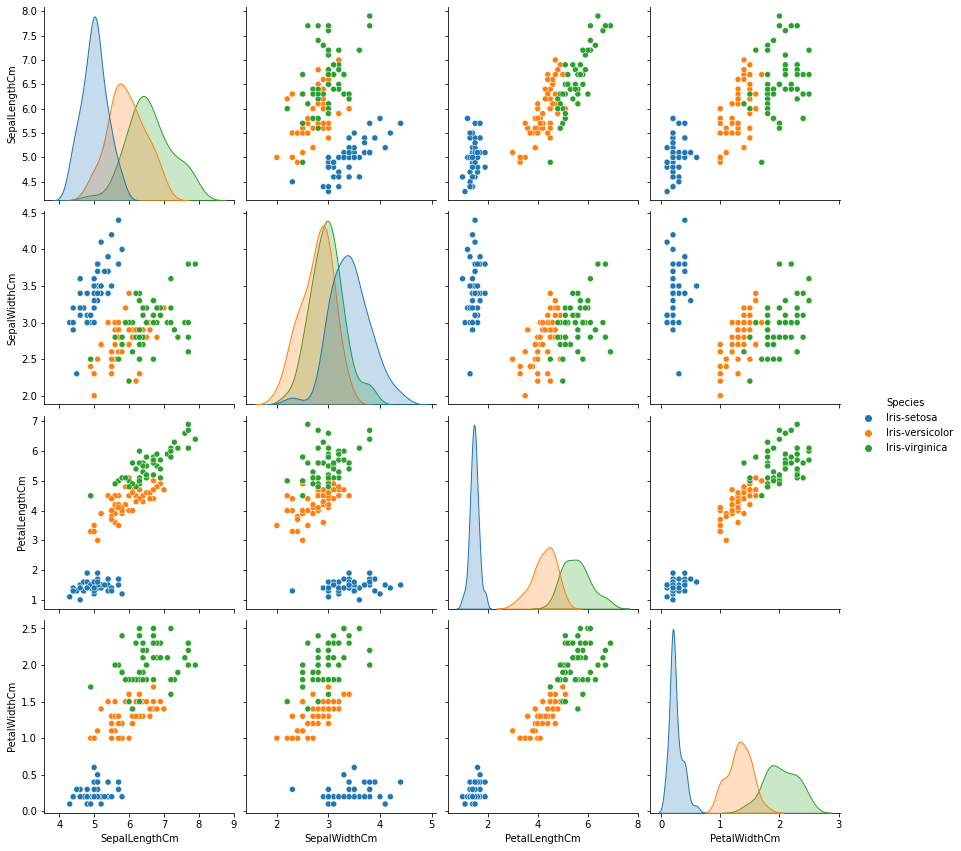

In [56]:
sns.pairplot(data,hue="Species",height=3);
plt.show()

# Predicting the optimum number of clusters (k means clustering) 

In [64]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

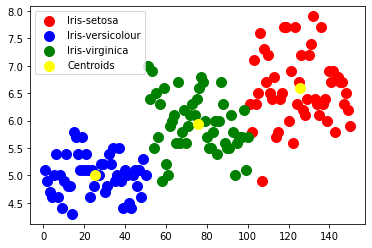

In [65]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

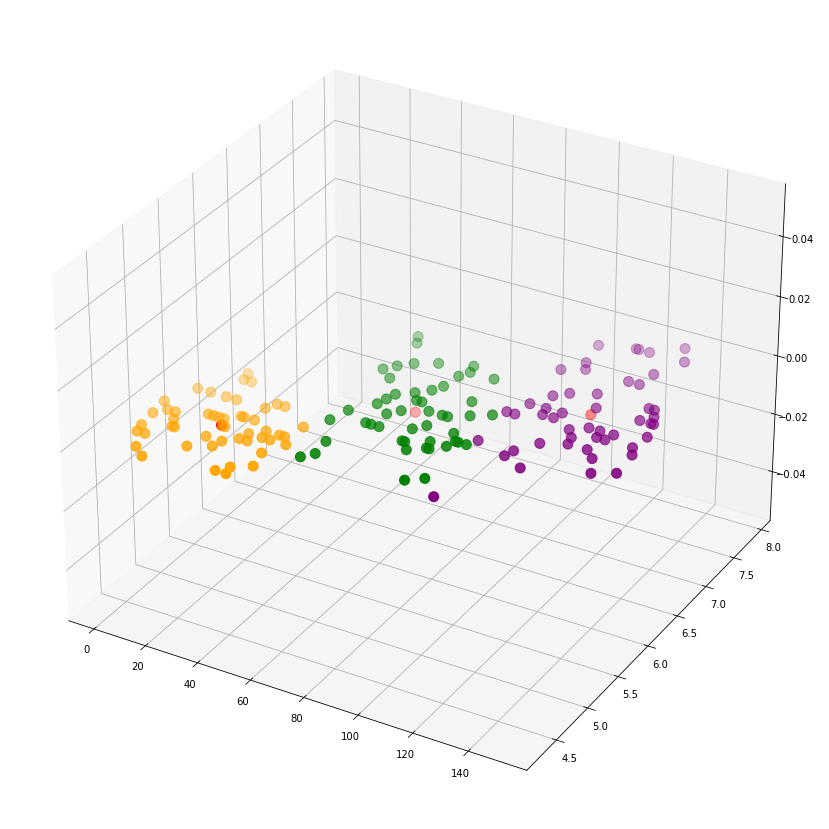

In [66]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

